In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# 데이터 준비

In [68]:
X = load_iris()['data']
y = load_iris()['target']
species = np.where(y == 0, 'setosa', np.where(y == 1, 'versicolor', 'virginica'))
data = pd.DataFrame(X, columns = load_iris()['feature_names'])
data['species'] = species

In [69]:
x = data.columns[:-1]
y = data.columns[-1]

In [70]:
data, x, y

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
 0                  5.1               3.5                1.4               0.2   
 1                  4.9               3.0                1.4               0.2   
 2                  4.7               3.2                1.3               0.2   
 3                  4.6               3.1                1.5               0.2   
 4                  5.0               3.6                1.4               0.2   
 ..                 ...               ...                ...               ...   
 145                6.7               3.0                5.2               2.3   
 146                6.3               2.5                5.0               1.9   
 147                6.5               3.0                5.2               2.0   
 148                6.2               3.4                5.4               2.3   
 149                5.9               3.0                5.1               1.8   
 
        specie

# 모델 작성

In [71]:
def entropy(x):
    px = np.unique(x,return_counts=True)[1]/len(x)
    entropy_ = -np.sum(px * np.log2(px))
    return entropy_

In [72]:
def info_gain(data,x,y):
    total = entropy(data[y])
    gain = []
    for val in np.unique(data[x]):
        info = data.loc[data[x] == val,y]
        count_info = len(info)
        p_info = count_info/len(data)
        gain.append(p_info*entropy(info))
    return total - np.sum(gain)

In [73]:
def max_gain(data,x,y):
    return x[np.argmax([info_gain(data,i,y) for i in x])]

In [74]:
def make_tree(data,x,y,parent_class=None):
    if np.unique(data[y]).size == 1:
        return np.unique(data[y])[0]
    elif len(data) == 0:
        return 'case1'
    elif len(x) == 0:
        return parent_class
    best_feature = max_gain(data,x,y)
    columns = x[x != best_feature]
    tree = {best_feature:{}}
    for val in np.unique(data[best_feature]):
        vals, counts = np.unique(data.loc[data[best_feature] == val,y],return_counts=True)
        parent_class = vals[np.argmax(counts)]
        sub_data = data.loc[data[best_feature] == val,:]
        sub_tree = make_tree(sub_data,columns,y,parent_class)
        tree[best_feature][val] = sub_tree
    return tree

# 모델 확인

In [75]:
info_gain(data,x[3],y), max_gain(data,x,y)

(1.4358978386754417, 'petal length (cm)')

In [76]:
# 질문 1 : gain이 1이 넘었는데 괜찮은가?

In [77]:
tree = make_tree(data,x,y)
pprint(tree)

{'petal length (cm)': {1.0: 'setosa',
                       1.1: 'setosa',
                       1.2: 'setosa',
                       1.3: 'setosa',
                       1.4: 'setosa',
                       1.5: 'setosa',
                       1.6: 'setosa',
                       1.7: 'setosa',
                       1.9: 'setosa',
                       3.0: 'versicolor',
                       3.3: 'versicolor',
                       3.5: 'versicolor',
                       3.6: 'versicolor',
                       3.7: 'versicolor',
                       3.8: 'versicolor',
                       3.9: 'versicolor',
                       4.0: 'versicolor',
                       4.1: 'versicolor',
                       4.2: 'versicolor',
                       4.3: 'versicolor',
                       4.4: 'versicolor',
                       4.5: {'sepal length (cm)': {4.9: 'virginica',
                                                   5.4: 'versicolor',
               

In [78]:
# 질문 2 : 가지가 너무 많은데 안좋은 경우인가?

# plot_tree로 그려보기

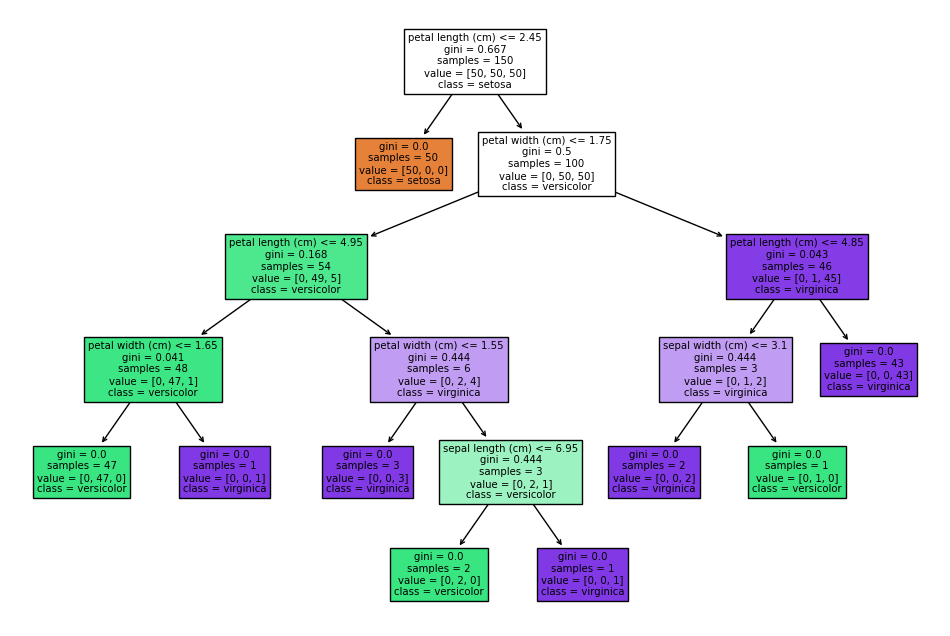

In [79]:
X = load_iris()['data']
y = load_iris()['target']
data = pd.DataFrame(X, columns=load_iris()['feature_names'])
data['species'] = np.where(y == 0, 'setosa', np.where(y == 1, 'versicolor', 'virginica'))

tree_model = DecisionTreeClassifier()
tree_model.fit(X, y)

plt.figure(figsize=(12, 8))
plot_tree(tree_model, feature_names=load_iris()['feature_names'], class_names=['setosa', 'versicolor', 'virginica'], filled=True)
plt.show()

# 임의의 데이터 넣어보기

In [80]:
np.unique(data['petal length (cm)'])

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.9, 3. , 3.3, 3.5, 3.6,
       3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9,
       5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.3,
       6.4, 6.6, 6.7, 6.9])

In [81]:
test_x = np.array([4.9, 2.8, 4.5, 1.7])
new_test_x = np.array([4.9, 2.8, 1.8, 1.7])

In [82]:
tree['petal length (cm)'][test_x[2]]['sepal length (cm)'][test_x[0]]

'virginica'

In [83]:
#tree['petal length (cm)'][new_test_x[2]]

In [84]:
# 질문 3 : 임의의 데이터를 넣을 때 트리에 없는 경우에는 어떻게 해야하나?

In [85]:
predicted_class = tree_model.predict([test_x])
class_names = load_iris()['target_names']
predicted_class_name = class_names[predicted_class]
predicted_class_name[0]

'virginica'

In [86]:
predicted_class = tree_model.predict([new_test_x])
class_names = load_iris()['target_names']
predicted_class_name = class_names[predicted_class]
predicted_class_name[0]

'setosa'

# 데이터 특성 새로 설정하기

In [87]:
new_data = data.copy()

In [88]:
from scipy.stats import iqr

# 특성 새로 설정해보기
ranges = []
for i in new_data.columns[:-1]:
    iqr_value = np.percentile(new_data[i], 75) - np.percentile(new_data[i], 25)
    bin_width = 2 * iqr_value / (len(new_data[i]))**(1/3)
    num_bins = int((new_data[i].max() - new_data[i].min()) / bin_width)
    new_feature = pd.cut(new_data[i], bins=num_bins, labels=False)
    bin_ranges = pd.cut(new_data[i], bins=num_bins).unique()
    bin_ranges = sorted([range_.left, range_.right] for range_ in bin_ranges)
    ranges.append(bin_ranges)
    new_data[i] = new_feature

In [89]:
new_x = new_data.columns[:-1]
new_y = new_data.columns[-1]

In [90]:
# 질문 4 : 이런식으로 하는게 좋은 방법인가?

In [91]:
new_data, new_x, new_y

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
 0                    1                 7                  0                 0   
 1                    1                 4                  0                 0   
 2                    0                 5                  0                 0   
 3                    0                 5                  0                 0   
 4                    1                 7                  0                 0   
 ..                 ...               ...                ...               ...   
 145                  4                 4                  2                 3   
 146                  3                 2                  2                 2   
 147                  4                 4                  2                 3   
 148                  3                 6                  2                 3   
 149                  3                 4                  2                 2   
 
        specie

# 새로운 특성으로 모델 작성

In [92]:
new_tree = make_tree(new_data,new_x,new_y)
pprint(new_tree)

{'petal width (cm)': {0: 'setosa',
                      1: 'versicolor',
                      2: {'petal length (cm)': {1: 'versicolor',
                                                2: {'sepal width (cm)': {0: {'sepal length (cm)': {3: 'versicolor'}},
                                                                         2: {'sepal length (cm)': {1: 'virginica',
                                                                                                   3: 'versicolor'}},
                                                                         3: {'sepal length (cm)': {2: 'virginica',
                                                                                                   3: 'virginica',
                                                                                                   4: 'versicolor'}},
                                                                         4: {'sepal length (cm)': {2: 'versicolor',
                                              

# 새로운 특성으로 plot_tree 그려보기

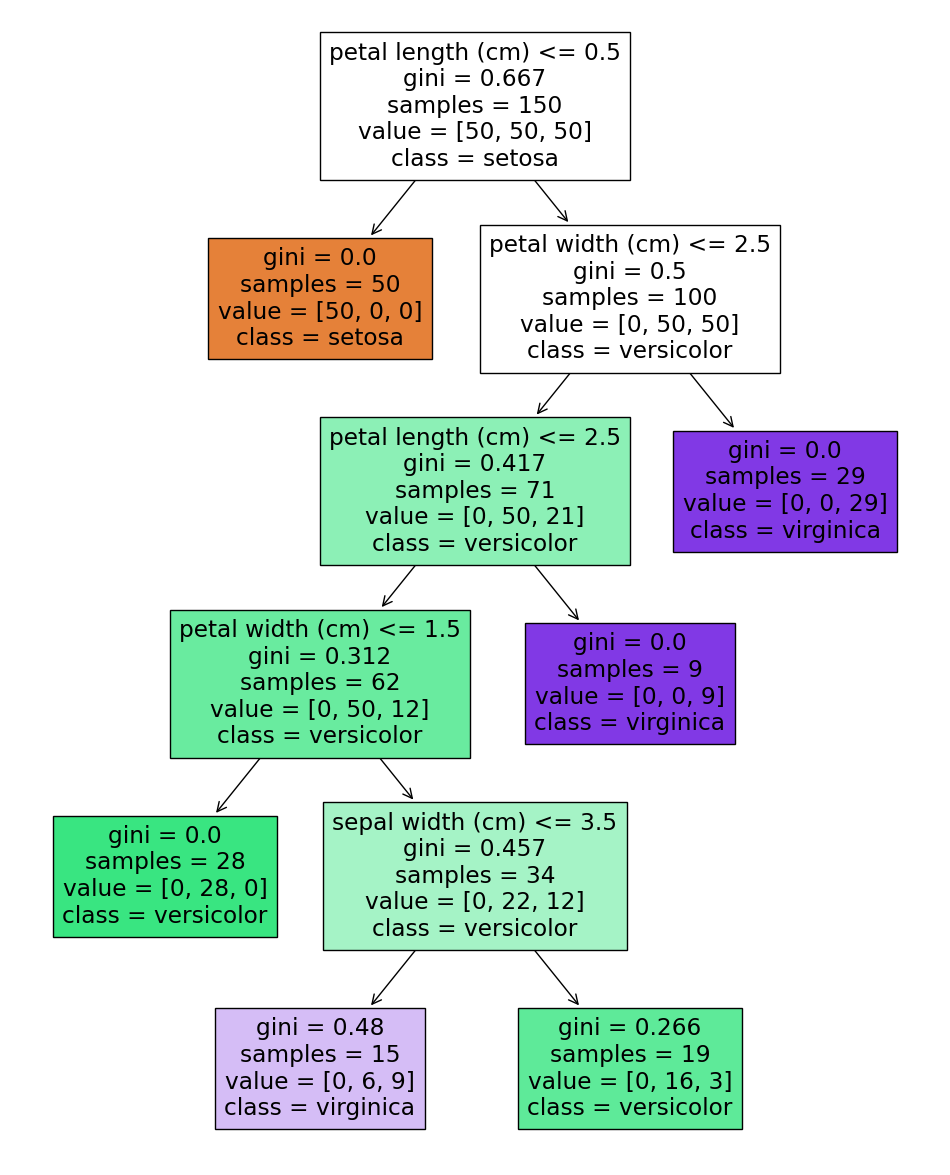

In [93]:
tree_model = DecisionTreeClassifier(max_depth=5)
new_y = load_iris()['target']
tree_model.fit(np.array(new_data[new_x]), new_y)

plt.figure(figsize=(12, 15))
plot_tree(tree_model, feature_names=load_iris()['feature_names'], class_names=['setosa', 'versicolor', 'virginica'], filled=True)
plt.show()

# 새로운 특성으로 임의의 데이터 넣어보기

In [110]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [95]:
new_data.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,4,4,2,3,virginica
146,3,2,2,2,virginica
147,4,4,2,3,virginica
148,3,6,2,3,virginica
149,3,4,2,2,virginica


In [111]:
test_x = np.array([5.1, 3.5, 1.4, 0.2])

In [112]:
def check_tree(x):
    x_new = []
    for i in range(len(ranges)):
        for j in range(len(ranges[i])):
            if ranges[i][j][0] < x[i] <= ranges[i][j][1]:
                x_new.append(j)
    predicted_class = tree_model.predict([x_new])
    class_names = load_iris()['target_names']
    predicted_class_name = class_names[predicted_class]
    return predicted_class_name[0]


In [113]:
check_tree(test_x)

'setosa'

In [100]:
test_x1 = np.array([3,6,2,3])
new_test_x1 = np.array([4,6,2,2])

In [101]:
new_tree['petal width (cm)'][new_test_x1[3]]['petal length (cm)'][new_test_x1[2]]['sepal width (cm)'][new_test_x1[1]]

'versicolor'

In [102]:
predicted_class = tree_model.predict([test_x1])
class_names = load_iris()['target_names']
predicted_class_name = class_names[predicted_class]
predicted_class_name[0]

'virginica'

In [103]:
predicted_class = tree_model.predict([new_test_x1])
class_names = load_iris()['target_names']
predicted_class_name = class_names[predicted_class]
predicted_class_name[0]

'versicolor'